In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
in_path = "/Users/Paul/research/files/analysis/cifar100_paper_sweep.csv"
df = pd.read_csv(in_path)



name_list = df.name.tolist()
ix = 0
fail_list = []
exp_name_list = ['dg_bbvgg13_do0_run1_rew12', 'dg_bbvgg13_do0_run1_rew15', 'dg_bbvgg13_do0_run2_rew12', 'dg_bbvgg13_do0_run2_rew15', 'dg_bbvgg13_do0_run3_rew12', 'dg_bbvgg13_do0_run3_rew15', 'dg_bbvgg13_do0_run4_rew12', 'dg_bbvgg13_do0_run4_rew15', 'dg_bbvgg13_do0_run5_rew12', 'dg_bbvgg13_do0_run5_rew15', 'dg_bbvgg13_do1_run1_rew12', 'dg_bbvgg13_do1_run1_rew15', 'dg_bbvgg13_do1_run2_rew12', 'dg_bbvgg13_do1_run2_rew15', 'dg_bbvgg13_do1_run3_rew12', 'dg_bbvgg13_do1_run3_rew15', 'dg_bbvgg13_do1_run4_rew12', 'dg_bbvgg13_do1_run4_rew15', 'dg_bbvgg13_do1_run5_rew12', 'dg_bbvgg13_do1_run5_rew15', 'dg_bbvgg16_do0_run1_rew12', 'dg_bbvgg16_do0_run1_rew15', 'dg_bbvgg16_do0_run2_rew12', 'dg_bbvgg16_do0_run2_rew15', 'dg_bbvgg16_do0_run3_rew12', 'dg_bbvgg16_do0_run3_rew15', 'dg_bbvgg16_do0_run4_rew12', 'dg_bbvgg16_do0_run4_rew15', 'dg_bbvgg16_do0_run5_rew12', 'dg_bbvgg16_do0_run5_rew15', 'dg_bbvgg16_do1_run1_rew12', 'dg_bbvgg16_do1_run1_rew15', 'dg_bbvgg16_do1_run2_rew12', 'dg_bbvgg16_do1_run2_rew15', 'dg_bbvgg16_do1_run3_rew12', 'dg_bbvgg16_do1_run3_rew15', 'dg_bbvgg16_do1_run4_rew12', 'dg_bbvgg16_do1_run4_rew15', 'dg_bbvgg16_do1_run5_rew12', 'dg_bbvgg16_do1_run5_rew15']
for exp in exp_name_list:
    if exp not in name_list:
        ix += 1
        fail_list.append(exp)
print(fail_list)
print(len(fail_list))

['dg_bbvgg13_do1_run1_rew12', 'dg_bbvgg13_do1_run1_rew15', 'dg_bbvgg13_do1_run2_rew12', 'dg_bbvgg13_do1_run2_rew15', 'dg_bbvgg13_do1_run3_rew12', 'dg_bbvgg13_do1_run3_rew15', 'dg_bbvgg13_do1_run4_rew12', 'dg_bbvgg13_do1_run4_rew15', 'dg_bbvgg13_do1_run5_rew12']
9


In [20]:
df = df.dropna(subset=["name", "model"])
df_clean = df.drop_duplicates(subset=["name", "study", "model", "network", "confid"])

In [21]:
df_clean.groupby("study").count()


,Unnamed: 0,name,model,network,fold,confid,n_test,accuracy,nll,brier_score,...,risk@90cov,risk@85cov,risk@80cov,risk@75cov,test_risk,test_cov,diff_risk,diff_cov,rstar,val_theta
study,,,,,,,,,,,,,,,,,,,,,
iid_study,295,295,295,85,295,295,295,295,295,295,...,295,295,295,295,295,295,295,295,295,295
in_class_study_wilds_animals_ood_test,295,295,295,85,295,295,295,295,295,295,...,295,295,295,295,295,295,295,295,295,295
val_tuning,295,295,295,85,295,295,295,295,295,295,...,295,295,295,295,295,295,295,295,295,295


In [22]:
df_clean.groupby("name").count()

,Unnamed: 0,study,model,network,fold,confid,n_test,accuracy,nll,brier_score,...,risk@90cov,risk@85cov,risk@80cov,risk@75cov,test_risk,test_cov,diff_risk,diff_cov,rstar,val_theta
name,,,,,,,,,,,,,,,,,,,,,
confidnet_bbresnet50_do0_run1_rew2.2,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
confidnet_bbresnet50_do0_run2_rew2.2,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
confidnet_bbresnet50_do0_run3_rew2.2,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
confidnet_bbresnet50_do0_run4_rew2.2,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
confidnet_bbresnet50_do0_run5_rew2.2,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
confidnet_bbresnet50_do1_run1_rew2.2,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
confidnet_bbresnet50_do1_run2_rew2.2,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
confidnet_bbresnet50_do1_run3_rew2.2,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
confidnet_bbresnet50_do1_run4_rew2.2,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33


In [114]:
x = df_clean[df_clean.study== "new_class_study_cifar10_original_mode"].groupby("name").count()
len(x[(x.fold == 3)]) +  len(x[(x.fold == 11)].fold)

0

In [115]:
len(df_clean.name.unique())

110

In [89]:

df = df_clean
df[(df.confid=="devries") & (df.study.str.contains("iid_study"))]

,Unnamed: 0,name,study,model,network,fold,confid,n_test,accuracy,nll,brier_score,failauc,failap_suc,failap_err,mce,ece,e-aurc,aurc,fpr@95tpr,risk@100cov,risk@95cov,risk@90cov,risk@85cov,risk@80cov,risk@75cov,test_risk,test_cov,diff_risk,diff_cov,rstar,val_theta
371,2,devries_bbvgg13_do0_run3_rew2.2,iid_study,devries_model,vgg13,0.0,devries,9000.0,0.75744,0.01005,0.35067,0.78025,0.91989,0.47664,0.36842,0.11355,65.47011,97.60374,0.82135,24.25556,22.59385,21.12346,19.32828,17.67319,16.10370,0.21291,0.90544,-0.00021,-0.00956,0.25,0.60446
380,2,devries_bbvgg13_do0_run2_rew2.2,iid_study,devries_model,vgg13,0.0,devries,9000.0,0.75422,0.01006,0.35232,0.78455,0.92021,0.50381,0.23928,0.12844,64.91217,97.94782,0.77351,24.57778,22.68210,20.79733,19.18703,17.74507,16.20741,0.20562,0.89378,-0.00701,-0.00922,0.25,0.66759
494,2,devries_bbvgg13_do0_run1_rew2.2,iid_study,devries_model,vgg13,0.0,devries,9000.0,0.75467,0.01025,0.35462,0.77876,0.91945,0.48031,0.22596,0.12094,65.74371,98.65413,0.80888,24.53333,22.86282,21.29367,19.56351,17.76389,16.35825,0.21680,0.91278,0.00399,-0.00822,0.25,0.59867
545,2,devries_bbvgg16_do0_run2_rew2.2,iid_study,devries_model,vgg16,0.0,devries,9000.0,0.75778,0.01147,0.37418,0.86269,0.95332,0.62145,0.28861,0.05677,37.77642,69.81753,0.66009,24.22222,21.57895,19.29630,16.80826,14.55933,12.45557,0.20502,0.92944,-0.00827,-0.00356,0.25,0.17596
551,2,devries_bbvgg16_do0_run3_rew2.2,iid_study,devries_model,vgg16,0.0,devries,9000.0,0.76367,0.01105,0.36698,0.87069,0.95732,0.63800,0.19553,0.05623,34.68645,65.11701,0.64786,23.63333,20.83041,18.51852,16.02614,13.54803,11.30370,0.21055,0.95411,-0.00306,-0.00089,0.25,0.14250
569,2,devries_bbvgg16_do0_run1_rew2.2,iid_study,devries_model,vgg16,0.0,devries,9000.0,0.76022,0.01121,0.37120,0.86432,0.95470,0.62425,0.21265,0.05288,36.77977,68.14681,0.67424,23.97778,21.29825,18.96828,16.80387,14.52778,12.26485,0.20337,0.93100,-0.01008,-0.00600,0.25,0.17966
1625,2,devries_bbvgg13_do0_run5_rew2.2,iid_study,devries_model,vgg13,0.0,devries,9000.0,0.75156,0.01022,0.35495,0.78751,0.92070,0.50715,0.25340,0.13282,64.36099,98.15355,0.79919,24.84444,22.87719,21.34041,19.52941,17.83086,16.35880,0.23068,0.95467,0.01684,0.00067,0.25,0.54153
1664,2,devries_bbvgg13_do0_run4_rew2.2,iid_study,devries_model,vgg13,0.0,devries,9000.0,0.75567,0.01018,0.35172,0.79977,0.92735,0.51937,0.21209,0.11195,59.08213,91.71173,0.76808,24.43333,22.33918,20.50617,18.86275,17.15952,15.41309,0.21791,0.93667,0.00423,-0.01333,0.25,0.51777
1715,2,devries_bbvgg16_do0_run4_rew2.2,iid_study,devries_model,vgg16,0.0,devries,9000.0,0.75733,0.01140,0.37604,0.86723,0.95435,0.63464,0.20143,0.05049,36.85317,69.01768,0.65842,24.26667,21.62320,19.09405,16.82353,14.33134,12.05926,0.21011,0.93867,-0.00257,0.00767,0.25,0.16214
1943,2,devries_bbvgg16_do0_run5_rew2.2,iid_study,devries_model,vgg16,0.0,devries,9000.0,0.76178,0.01124,0.37047,0.86591,0.95514,0.62532,0.24543,0.05326,36.43917,67.38136,0.64879,23.82222,21.08772,18.71605,16.54686,14.39878,11.94074,0.19832,0.92333,-0.01450,0.00233,0.25,0.18579


In [77]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
meanprops = dict(linestyle='-', linewidth=1, color='k', alpha=0.5)
whiskerprops=dict(linestyle='-', linewidth=0)
#df[(df.study.str.contains("tinyimagenet_resize_original")) & ~(df.name.str.contains("det"))][["name", "confid", "accuracy", "failauc", "failap_err", "aurc"]].sort_values(by="failauc", ascending=False)

<ipython-input-77-6bbc6dd86d9c>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [123]:
df["backbone"] = df.apply(lambda row: row["name"].split("bb")[1].split("_")[0], axis=1)
df["dropout"] = df.apply(lambda row: row["name"].split("do")[1].split("_")[0], axis=1)
df["model"] = df.apply(lambda row: row["name"].split("_")[0], axis=1)
df["run"] = df.apply(lambda row: row["name"].split("run")[1].split("_")[0] if "run" in row["name"] else "-1", axis=1)
# df["relu"] = df.apply(lambda row: "last" if ("last" in row["name"] or row["backbone"]=="vgg") else "first", axis=1)
# df["reflect"] = df.apply(lambda row: False if ("noreflect" in row["name"] or row["backbone"]=="vgg") else True, axis=1)
df["rew"] = df.apply(lambda row: row["name"].split("_rew")[1].split("_")[0], axis=1)
#df["sched"] = df.apply(lambda row: "Multi" if "MultiStep" in row["name"] else "Cosine", axis=1)
#df["co"] = df.apply(lambda row: True if "coTrue" in row["name"] else False, axis=1)


# df["ms"] = df.apply(lambda row: False if "msFalse" in row["name"] else True, axis=1)
# df.backbone.tolist()

In [124]:
non_agg_columns = ["study", "model", "backbone", "rew", "dropout", "confid"]
import numpy as np
dfg = df.groupby(by=non_agg_columns).mean().reset_index()
dfg_std = df.groupby(by=non_agg_columns).std().reset_index()
rename_dict = {k:"{}_std".format(k) for k in dfg.columns if k not in non_agg_columns }
dfg_std = dfg_std.rename(columns=rename_dict)
print(len(df), len(dfg), len(dfg_std))
print(dfg_std.columns)
print(rename_dict)

1620 540 540
Index(['study', 'model', 'backbone', 'rew', 'dropout', 'confid',
       'Unnamed: 0_std', 'fold_std', 'n_test_std', 'accuracy_std', 'nll_std',
       'brier_score_std', 'failauc_std', 'failap_suc_std', 'failap_err_std',
       'mce_std', 'ece_std', 'e-aurc_std', 'aurc_std', 'fpr@95tpr_std',
       'risk@100cov_std', 'risk@95cov_std', 'risk@90cov_std', 'risk@85cov_std',
       'risk@80cov_std', 'risk@75cov_std', 'test_risk_std', 'test_cov_std',
       'diff_risk_std', 'diff_cov_std', 'rstar_std', 'val_theta_std'],
      dtype='object')
{'Unnamed: 0': 'Unnamed: 0_std', 'fold': 'fold_std', 'n_test': 'n_test_std', 'accuracy': 'accuracy_std', 'nll': 'nll_std', 'brier_score': 'brier_score_std', 'failauc': 'failauc_std', 'failap_suc': 'failap_suc_std', 'failap_err': 'failap_err_std', 'mce': 'mce_std', 'ece': 'ece_std', 'e-aurc': 'e-aurc_std', 'aurc': 'aurc_std', 'fpr@95tpr': 'fpr@95tpr_std', 'risk@100cov': 'risk@100cov_std', 'risk@95cov': 'risk@95cov_std', 'risk@90cov': 'risk@90c

In [129]:
study= "new_class_study_cifar10_original_mode"
select = (dfg.study == study)
data =  dfg[select]
data_std =  dfg_std[select]
# data =  df[(df.study == "new_class_study_tinyimagenet_resize_original_mode")]
#data =  df[(df.study == "iid_study")  & (df.backbone == "vgg16") ]

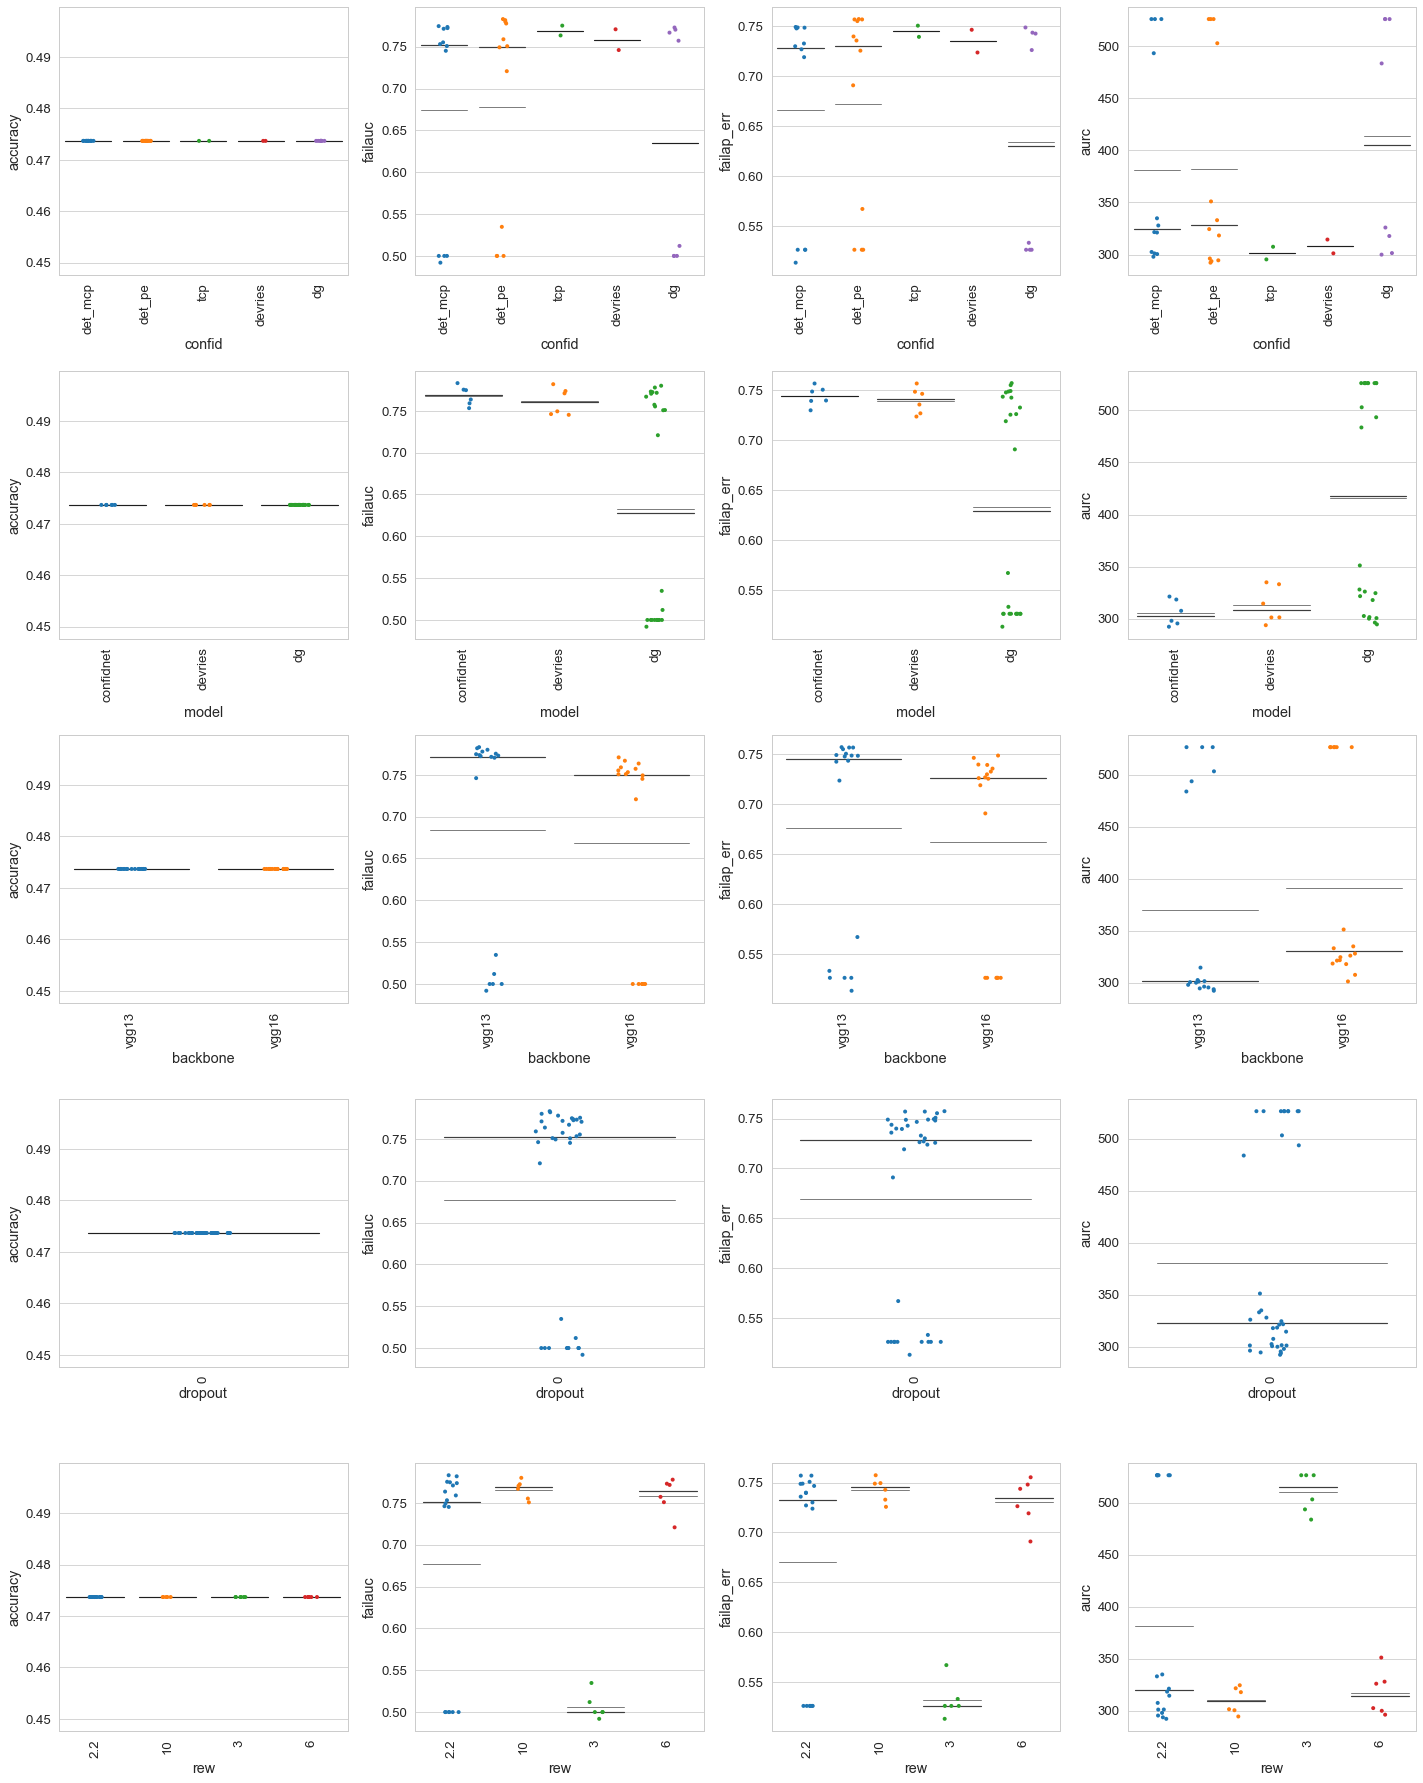

In [130]:


plot_data = data # & (data["ne"].str.contains("250")) & (data["ap"]==False)]
scale = 5
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=scale * 0.3)
dims = ["confid", "model", "backbone", "dropout", "rew"]
metrics = ["accuracy", "failauc", "failap_err", "aurc"]

f, axs = plt.subplots(nrows=len(dims), ncols=len(metrics), figsize=(len(metrics)*scale, len(dims)*scale))
for xix, dim in enumerate(dims):
    for yix, metric in enumerate(metrics):
        y = metric
        sns.stripplot(ax=axs[xix, yix], x=dim, y=metric, data=plot_data, s = scale*0.8)
        sns.boxplot(ax=axs[xix, yix], x=dim, y=metric, data=plot_data, saturation=0, showbox=False, showcaps=False, showfliers=False, whiskerprops=whiskerprops, showmeans=True, meanprops=meanprops, meanline=True)
        axs[xix, yix].set_xticklabels(axs[xix, yix].get_xticklabels(),rotation=90)
        # if "iid" in study and metric == "aurc":
        #     axs[xix, yix].set_ylim(4, 8)
        # if "iid" in study and metric == "failauc":
        #     axs[xix, yix].set_ylim(0.90, 0.96)
plt.tight_layout()
# plt.savefig("/Users/Paul/research/files/analysis/{}_cifar10.png".format(study))

In [131]:
std_columns = [c for c in data_std.columns if "std"in c]
for s in std_columns:
    data[s] = data_std[s]

print(data.columns)
print(data_std.columns)
print(len(data))
data[["model", "backbone",  "dropout",  "confid",  "rew", "accuracy", "accuracy_std", "failauc", "failauc_std", "aurc", "aurc_std", "failap_suc", "risk@100cov", "risk@95cov", "risk@90cov", "risk@85cov", "risk@80cov"]].sort_values(by="aurc", ascending=True)

Index(['study', 'model', 'backbone', 'rew', 'dropout', 'confid', 'Unnamed: 0',
       'fold', 'n_test', 'accuracy', 'nll', 'brier_score', 'failauc',
       'failap_suc', 'failap_err', 'mce', 'ece', 'e-aurc', 'aurc', 'fpr@95tpr',
       'risk@100cov', 'risk@95cov', 'risk@90cov', 'risk@85cov', 'risk@80cov',
       'risk@75cov', 'test_risk', 'test_cov', 'diff_risk', 'diff_cov', 'rstar',
       'val_theta', 'Unnamed: 0_std', 'fold_std', 'n_test_std', 'accuracy_std',
       'nll_std', 'brier_score_std', 'failauc_std', 'failap_suc_std',
       'failap_err_std', 'mce_std', 'ece_std', 'e-aurc_std', 'aurc_std',
       'fpr@95tpr_std', 'risk@100cov_std', 'risk@95cov_std', 'risk@90cov_std',
       'risk@85cov_std', 'risk@80cov_std', 'risk@75cov_std', 'test_risk_std',
       'test_cov_std', 'diff_risk_std', 'diff_cov_std', 'rstar_std',
       'val_theta_std'],
      dtype='object')
Index(['study', 'model', 'backbone', 'rew', 'dropout', 'confid',
       'Unnamed: 0_std', 'fold_std', 'n_test_std', '

<ipython-input-131-20d4066520bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[s] = data_std[s]


,model,backbone,dropout,confid,rew,accuracy,accuracy_std,failauc,failauc_std,aurc,aurc_std,failap_suc,risk@100cov,risk@95cov,risk@90cov,risk@85cov,risk@80cov
37,confidnet,vgg13,0,det_pe,2.2,0.47368,0.0,0.783000,0.003183,292.155763,2.684871,0.793663,52.63158,51.128137,49.420247,47.688717,45.807130
43,devries,vgg13,0,det_pe,2.2,0.47368,0.0,0.781733,0.002045,293.605527,1.491444,0.791003,52.63158,51.050670,49.474690,47.692943,45.758327
49,dg,vgg13,0,det_pe,10,0.47368,0.0,0.779903,0.004917,294.402797,4.384419,0.789977,52.63158,51.046147,49.373403,47.727807,45.775163
38,confidnet,vgg13,0,tcp,2.2,0.47368,0.0,0.775190,0.002704,295.301563,1.775822,0.789587,52.63158,51.089563,49.474670,47.730793,45.891540
58,dg,vgg13,0,det_pe,6,0.47368,0.0,0.777730,0.002082,296.141727,2.406650,0.786970,52.63158,51.047050,49.421270,47.703457,45.833890
36,confidnet,vgg13,0,det_mcp,2.2,0.47368,0.0,0.774593,0.003209,297.843703,2.668172,0.784627,52.63158,51.119893,49.484457,47.780597,46.020270
59,dg,vgg13,0,dg,6,0.47368,0.0,0.772927,0.002695,299.883423,3.415239,0.780530,52.63158,51.153257,49.670567,48.000247,46.250163
48,dg,vgg13,0,det_mcp,10,0.47368,0.0,0.772223,0.004464,300.411860,4.481656,0.780137,52.63158,51.029413,49.357890,47.680467,45.956490
42,devries,vgg13,0,det_mcp,2.2,0.47368,0.0,0.773553,0.001550,301.046840,1.237871,0.778383,52.63158,51.065517,49.459077,47.777443,45.908423
47,devries,vgg16,0,devries,2.2,0.47368,0.0,0.770803,0.003191,301.122060,4.011503,0.778653,52.63158,51.066460,49.471737,47.899397,46.234980


In [ ]:
df[(df.study == "iid_study") & (df.dropout == "1")]

In [ ]:
import numpy as np
np.std([0.95000, 0.94633, 1])
np.std([95.000, 94.633], ddof=1)